In [1]:
""""
wine quality selection

using a Random Forest Classifier to do a binary classification of high quality wine and low quality wine.
"""

'"\nwine quality selection\n\nusing a Random Forest Classifier to do a binary classification of high quality wine and low quality wine.\n'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
df = pd.read_csv('/home/ebilinux/Desktop/My_Files/winequality/redwinequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#checking NAs
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# removing target variable 'quality'
y = df.quality                  
X = df.drop('quality', axis=1)  
print(y.shape, X.shape)

(1599,) (1599, 11)


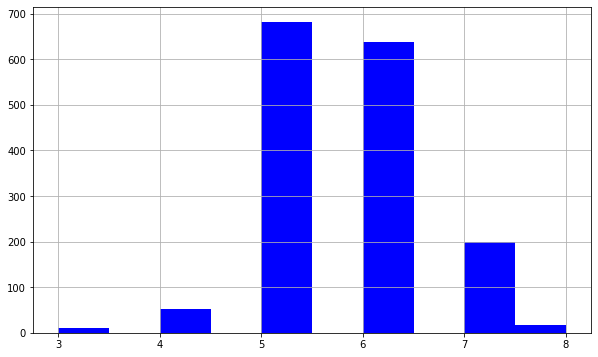

In [8]:


# data.hist(figsize=(10,10))

df['quality'].hist(figsize=(10,6), color='blue')
plt.show()



Most wines are rated 5 or 6

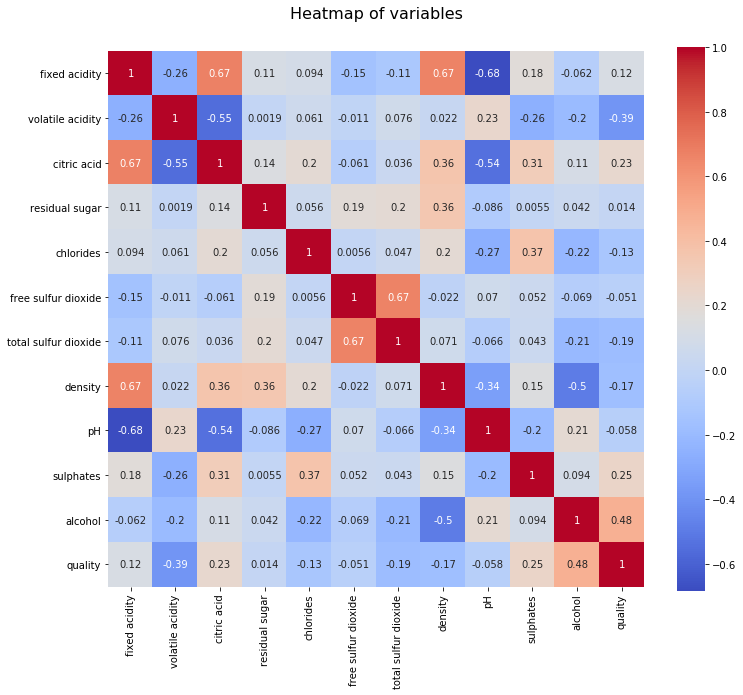

In [9]:
#correlation between variables
    
plt.figure(figsize=(12,10))
plt.title('Heatmap of variables', y=1.05, size=16)
sns.heatmap(df.astype(float).corr(),cmap="coolwarm", vmax=1.0, square=True, linecolor='white', annot=True)

Alcohol has highest correlation to wine quality follow by acidity, sulphates, density and chlorides

In [10]:
#splitting the data in two categories, high and low quaity wine
y_high = (y > 5).astype(int)
y_high.head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64

**training model with Random Forest**

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [12]:
#splitting dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y_high, test_size=0.2,random_state=13)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


prediction

In [13]:
rf = RandomForestClassifier(random_state= 13)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

# Print 10 results
for i in range(0,10):
    print('wine quality  Actual:' , y_test.iloc[i], 'predicted:', pred_rf[i])
    

wine quality  Actual: 1 predicted: 1
wine quality  Actual: 0 predicted: 0
wine quality  Actual: 0 predicted: 0
wine quality  Actual: 0 predicted: 0
wine quality  Actual: 1 predicted: 1
wine quality  Actual: 0 predicted: 0
wine quality  Actual: 0 predicted: 1
wine quality  Actual: 1 predicted: 1
wine quality  Actual: 0 predicted: 0
wine quality  Actual: 0 predicted: 0


Above, just to see the model performance, 1 error out of 10 observations. Now checking the model accuracy.

In [14]:
print(confusion_matrix(y_test, pred_rf))
print(accuracy_score(y_test, pred_rf))

[[125  30]
 [ 33 132]]
0.803125


totally, 63 wrong classifications.
let's improve our model

In [15]:
#tuning hyperparameters of the Random Forest


from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators':[50,100,200],
               'max_depth':[None,30,15,5],
               'max_features':['auto','sqrt','log2'],
               'min_samples_leaf':[1,20,50,100]}

rf_grid = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=13,
                               

In [16]:
rf_grid.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 200}

recommended values are same as default except for number of estimators

In [17]:
# training model with tuned parameters
rf2 = RandomForestClassifier(n_estimators=200,max_depth = 15, max_features='auto' ,min_samples_leaf=1,random_state=13)
rf2.fit(X_train,y_train)
pred_rf2 = rf2.predict(X_test)

In [18]:
print(confusion_matrix(y_test,pred_rf2))
print(accuracy_score(y_test,pred_rf2))

[[125  30]
 [ 31 134]]
0.809375


second model improved a little bit and managed to predict two values more in comparison to first model